# Crypto price prediction

In this project, we're going to simply find out how we can do a simple prediction on cryptocurrency prices. This piece of code is heavily inspired by [this video](https://www.youtube.com/watch?v=GFSiL6zEZF0) and it's not a serious project. It's more like some sort of fun project you'd do in a weekend, or a project that shows your abilities in converting your ideas to ML/DL projects. 

## 0. Data Gathering

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import pandas_datareader as web
import datetime as dt

After importing our very essential dependencies like `numpy` or `matplotlib` it is time to just go ahead and decide about what we're going to do with our project. In this part, we decide which currency is our goal. For this particular project, I used Bitcoin. You can use another one like Ethereum, Ripple or Doge. Also, you can change `against_currency` to what you need more that US Dollars. For example you can put it to `CAD` for Canadian Dollar or `EUR` for Euro. It's completely up to you to decide about these currencies.

In [8]:
crypto_currency = "BTC"
against_currency = "USD"

We also need a _time frame_ for our project. This is some sort of daily time frame we've used here and we're monitoring the price of _BTC_ since 2018. 

In [7]:
start_date = dt.datetime(2018, 1, 1)
end_date = dt.datetime.now()

This part is also for gathering data from _Yahoo Finance API_. For more information about API's, I suggest taking a look at `pandas_datareader` documents.

In [9]:
data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start_date, end_date)

In [10]:
data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,1.029120e+10,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,1.684660e+10,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,1.687190e+10,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,2.178320e+10,15599.200195
2018-01-05,17705.199219,15202.799805,15477.200195,17429.500000,2.384090e+10,17429.500000
2018-01-06,17712.400391,16764.599609,17462.099609,17527.000000,1.831460e+10,17527.000000
2018-01-07,17579.599609,16087.700195,17527.300781,16477.599609,1.586600e+10,16477.599609
2018-01-08,16537.900391,14208.200195,16476.199219,15170.099609,1.841390e+10,15170.099609
2018-01-09,15497.500000,14424.000000,15123.700195,14595.400391,1.666000e+10,14595.400391


In [11]:
data.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-03,63516.937500,61184.238281,63254.335938,62970.046875,3.612473e+10,62970.046875
2021-11-04,63123.289062,60799.664062,62941.804688,61452.230469,3.261585e+10,61452.230469
2021-11-05,62541.468750,60844.609375,61460.078125,61125.675781,3.060510e+10,61125.675781
2021-11-06,61590.683594,60163.781250,61068.875000,61527.480469,2.909493e+10,61527.480469
2021-11-07,63326.988281,61432.488281,61554.921875,63326.988281,2.472675e+10,63326.988281
2021-11-08,67673.742188,63344.066406,63344.066406,67566.828125,4.112561e+10,67566.828125
2021-11-09,68530.335938,66382.062500,67549.734375,66971.828125,4.235799e+10,66971.828125
2021-11-10,68789.625000,63208.113281,66953.335938,64995.230469,4.873083e+10,64995.230469
2021-11-11,65579.015625,64180.488281,64978.890625,64949.960938,3.588063e+10,64949.960938


## 1. Data Preparation

In [3]:
from sklearn.preprocessing import MinMaxScaler`

Now we need to scale our data. As we're going to use a Neural Network, it's better to scale our data to something between 0 and 1, or -1 to 1. It all depends on what our input data is. In this case, 0 to 1 is preferred, as _price_ is always a positive number.

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))

What we've chosen here as our goal for prediction is the _Close_ price (you may chose others such as _Open_ or _High_, but _Close_ price is what we consider for making decisions about our future trades or purchases. And I guess it'd be fun to mess around with other parts of the dataset as well

In [15]:
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

## 1.1. Making Neural-Network friendly data

First, we need to find out our chunk of time that we want to put our predictions based on. In this example, I have choses 30 days. The main reason for this is that I do not really want to rely on this as a serious tool. I just wanted to test some ideas, so 30 days for a time period is far more than enough. 

In [16]:
prediction_days = 30 

I highly recommend using `train_test_split` to most of my friends when they do ML/DL projects. But in this particular case, as we wanted a specific chunk of our data, I do it this way: 

In [20]:
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

Remember that the nueral network will accept a _numpy array_ as an input, so we need to convert our input data to numpy arrays before doing anything serious with them.

In [23]:
x_train, y_train = np.array(x_train), np.array(y_train)

And finally, we're going to do some reshaping to our `x_train` part of the data. `x` is usually called _independent variable_ and if you pay attention closely, you see that it includes our time chunks. Neural networks need some 3-dimensional type of input for `x` axis. So this is why we add this simple dimension to our data.

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## 2. Welcome to the circus!

Now we're going to do the DL magic. For this particular project, LSTM is preferred because it is based on a short-term type of data. This is why we've chosen this.

In [4]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

Now we create our model like this. We add to many `Dropout` layers to make sure our model doesn't do overfit. 

In [27]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))

And here, we just _compile_ a model. a compiled model, has nothing to do yet. We just create some sort of _brain_ which has nothing in it. Like a new-born (this is a bad example by the way. Because new-borns have a lot in their genetic code. This is why babies can make noises or cry when they need food or some other type of attention). 

In this new brain, we have to _fit_ the data. Which we exactly have done in the very next section.

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

## 2.1. Training the model

In [29]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
44/44 [==============================] - 4s 21ms/step - loss: 0.0115
Epoch 2/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0021
Epoch 3/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0023
Epoch 4/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0021
Epoch 5/25
44/44 [==============================] - 1s 23ms/step - loss: 0.0016
Epoch 6/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0017
Epoch 7/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0017
Epoch 8/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0024
Epoch 9/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0014
Epoch 10/25
44/44 [==============================] - 1s 21ms/step - loss: 0.0013
Epoch 11/25
44/44 [==============================] - 1s 21ms/step - loss: 0.0013
Epoch 12/25
44/44 [==============================] - 1s 22ms/step - loss: 0.0012
Epoch 13/25
44/44 [==================

## 3. Preparing for the tests

In this section, we're just going to repeat some parts again. Reason? Because we need som _test data_. So this is why we have this section. 

In [30]:
test_start_date = dt.datetime(2020, 1, 1)
test_end_date = dt.datetime.now()

We again get data from _Yahoo Finance API_ and store it in a new variable.

In [31]:
test_data = data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start_date, test_end_date)

In [32]:
test_data.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277


This is the most confusing part of the project. First, we create a huge list of values from our test data. Which are actual prices of Bitcoin (or other currency of your choice. Remember you also can do this to non-crypto currencies as well) and we need them to see how accurate our model was. 

In [33]:
actual_prices = test_data['Close'].values

And here, we just add the whole test data to our bigger dataset. The reason here is having no trouble in testing the model later.

In [35]:
total_data = pd.concat((data['Close'], test_data['Close']), axis=0)

## 4. Making desired inputs

For models, we need different inputs, right? here we just filter out our inputs to something we need. We exactly need the past 30 days of data and this is how we do it:

In [38]:
model_inputs = total_data[len(total_data) - len(test_data) - prediction_days:].values

Then, we need to reshape our data in case we need to scale them. It is pretty much similar to what we've done with our very first input data.

In [39]:
model_inputs = model_inputs.reshape(-1, 1)

And here, we just scale down our data because our model understand it better.

In [40]:
model_inputs = scaler.fit_transform(model_inputs)

## 4.1. Making the test data

In [42]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x , 0])
    
x_test = np.array(x_test)

We just fill our array as before. Nothing has changed. And we do reshaping because we have done it on our training data (and reasons for that are up there). 

In [43]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## 5. Predictions, finally!

In [46]:
predicted_price = model.predict(x_test)

In [47]:
predicted_price = scaler.inverse_transform(predicted_price)

## 6. Plotting predictions

First, we need to extract dates from the dataframe we have. it is as easy as this:

In [81]:
dates = []

for d in range(len(test_data)):
    newdate = str(test_data.index[d])
    dates.append(newdate[0:10])

by the way, it's a little bit tricky. So I personally recommend you to have the above code snippet in mind. And we also can convert dates to understandable format for `matplotlib` like this:

In [85]:
import matplotlib

dates = matplotlib.dates.date2num(dates)

and finally, we can get his beautiful plot:

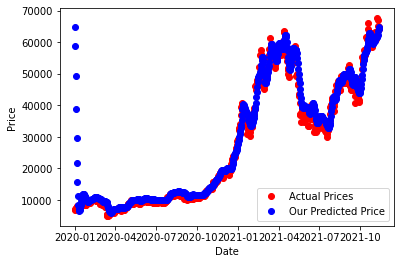

In [86]:
plt.plot_date(dates, actual_prices, color='red', label='Actual Prices')
plt.plot_date(dates, predicted_price, color='blue', label='Our Predicted Price')

plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()

plt.show()